# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [144]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [145]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [146]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [147]:
# we only take the first two features. 
X=iris.data[:,:2]
print(X.shape)
Y=iris.target
print(Y.shape)
print(Y)

(150, 2)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [148]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [149]:
print('target_names:'+str(iris['target_names']))

target_names:['setosa' 'versicolor' 'virginica']


In [150]:
#建立Target欄位與資料
y=pd.DataFrame(iris['target'],columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [151]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [152]:
#只選擇目標為0與1的資料
iris_data=iris_data[iris_data['target'].isin([0,1])]
print(iris['data'].size/len(iris['feature_names']))
#原先iris['data']的資料數
iris_data
#只選目標為0與1的資料筆數

150.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


## 切分訓練集與測試集
> train_test_split()

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(iris_data[['sepal length (cm)','sepal width (cm)']],iris_data['target'],test_size=0.3)

In [154]:
print(X_train.shape)
X_train.head()

(70, 2)


,sepal length (cm),sepal width (cm)
32,5.2,4.1
87,6.3,2.3
69,5.6,2.5
54,6.5,2.8
84,5.4,3.0


In [155]:
print(X_test.shape)
X_test.head()

(30, 2)


,sepal length (cm),sepal width (cm)
5,5.4,3.9
7,5.0,3.4
48,5.3,3.7
51,6.4,3.2
1,4.9,3.0


In [156]:
print(Y_train.shape)
Y_train.head()

(70,)


32    0
87    1
69    1
54    1
84    1
Name: target, dtype: int32

In [157]:
print(Y_test.shape)
Y_test.head()

(30,)


5     0
7     0
48    0
51    1
1     0
Name: target, dtype: int32

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [158]:
import warnings
warnings.filterwarnings("ignore")
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [110]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
print('arr_x_train:',arr_x_train[:10])
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
print('\n')
print('arr_x_test',arr_x_test[0:10]) 

arr_x_train: [[ 0.00428377 -1.57152185]
 [-0.74537514  0.91450141]
 [-0.74537514  0.5001642 ]
 [ 0.90387445 -0.53567882]
 [-1.0452387   0.70733281]
 [-0.59544336  1.53600723]
 [ 1.65353336 -0.32851022]
 [ 0.90387445 -0.12134161]
 [-0.2955798   1.32883862]
 [ 1.05380623 -0.32851022]]


arr_x_test [[-1.26390021  0.01490878]
 [-0.55184376  0.46217207]
 [-0.72985787 -0.43235452]
 [ 0.33822682 -1.10324946]
 [-0.37382964  0.46217207]
 [-0.55184376  0.68580372]
 [-0.01780141  1.58033031]
 [ 1.05028328 -0.65598616]
 [ 1.22829739 -0.87961781]
 [ 1.76233974 -0.65598616]]


## use sklearn

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.41142857 3.10714286]
[0.64819372 0.45018137]


In [160]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.32618115,  2.20546031],
       [ 1.37084238, -1.79292817],
       [ 0.29091832, -1.34866278],
       [ 1.67939212, -0.6822647 ],
       [-0.01763141, -0.23799931]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [161]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-0.01763141  1.76119492]
 [-0.63473088  0.65053146]
 [-0.17190628  1.31692954]
 [ 1.52511725  0.20626607]
 [-0.78900575 -0.23799931]
 [ 0.59946805 -1.12653009]
 [-0.78900575 -0.01586662]
 [ 0.59946805  1.98332762]
 [ 1.06229265 -0.6822647 ]
 [ 0.90801779 -2.01506086]]


you can also use fit_transform method (i.e., fit and then transform)    

In [162]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.35450928  1.54160033]
 [-1.02976506  0.60160013]
 [-0.52332323  1.16560025]
 [ 1.33363016  0.22560005]
 [-1.198579   -0.15040003]
 [ 0.32074649 -0.90240019]
 [-1.198579    0.03760001]
 [ 0.32074649  1.72960037]
 [ 0.82718832 -0.52640011]
 [ 0.65837438 -1.65440035]]


In [163]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


48.92902099862736
29.79495316812337


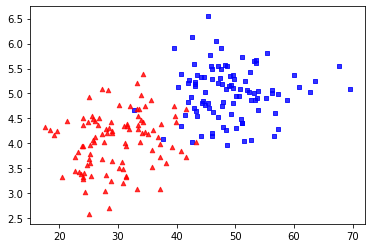

In [164]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [165]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [166]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [167]:
minmax_norm(x_val[:10])

array([0.67191411, 0.83616811, 0.70216028, 0.92573526, 1.        ,
       0.79150569, 0.        , 0.61175076, 0.37871517, 0.68048049])

In [168]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200,)
[69.50647445]
[[0.54759932]
 [0.61018284]
 [0.55912362]
 [0.64430943]
 [0.67260553]
 [0.59316571]
 [0.29158881]
 [0.52467608]
 [0.43588562]
 [0.55086326]]
